In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('./Data/train.csv')

In [3]:
data.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [16]:
data = data.drop(['data_source'], axis=1)

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
seq_id,31390.0,15694.500000,9061.656811,0.00,7847.25,15694.5,23541.75,31389.0
pH,31390.0,6.892339,1.604863,1.99,7.00,7.0,7.00,64.9
tm,31390.0,49.147337,14.010089,-1.00,42.10,48.0,53.80,130.0


In [18]:
data.isnull().sum()

seq_id              0
protein_sequence    0
pH                  0
tm                  0
dtype: int64

In [19]:
data.shape

(31390, 4)

In [20]:
data['pH'] = data['pH'].fillna(data['pH'].mean())

In [21]:
amino_acids = {'A', 'R', 'N', 'D', 'E', 'C', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V'}

In [22]:
for amino_acid in amino_acids:
    data[amino_acid] = data['protein_sequence'].apply(lambda seq: seq.count(amino_acid))

In [24]:
data.head()

,seq_id,protein_sequence,pH,tm,C,D,N,Q,H,K,...,V,W,R,S,A,P,I,G,E,T
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7,1,13,5,6,3,16,...,37,4,25,11,45,18,14,38,30,14
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5,0,10,6,22,4,19,...,13,3,30,14,28,8,13,18,52,12
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5,9,27,15,25,11,39,...,30,3,31,33,50,20,16,65,32,30
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2,5,19,9,9,7,17,...,14,3,10,16,20,16,10,16,29,19
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5,14,78,65,54,40,68,...,124,16,63,148,86,128,71,84,78,120


Text(0.5, 1.0, 'Ph VS tm')

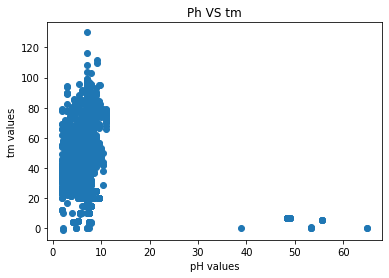

In [34]:
# Plotting the relation between pH and tm

pH = data['pH']
tm = data['tm']
plt.scatter(pH, tm)
plt.xlabel('pH values')
plt.ylabel('tm values')
plt.title('Ph VS tm')

In [35]:
# CALCULATING CHEMICAL PROPERTIES OF PROTEIN SEQUENCES

